In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
#import foresthelpers.featureimportance as fi
from sklearn.utils import resample
from sklearn.metrics import log_loss
import keras
import tensorflow as tf
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline as pyo
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('crime_cat.csv')
#df.drop('Unnamed: 0',axis=1,inplace=True)
df=df[df['UCR']!=3]
df.head()

,Charlestown,Dorchester,Downtown,East Boston,Hyde Park,Jamaica Plain,Mattapan,Roxbury,South Boston,South End,...,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,UCR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
df['UCR'].value_counts()

2    157531
1     97055
0     61411
Name: UCR, dtype: int64

## Upsample the data

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
X[0:5]

,Charlestown,Dorchester,Downtown,East Boston,Hyde Park,Jamaica Plain,Mattapan,Roxbury,South Boston,South End,...,Restraining Order Violations,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head(3)

0    0
1    1
2    2
Name: UCR, dtype: int64

In [19]:
def data_split(dataframe):
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
#Concatenate the traning data back
X = pd.concat([X_train, y_train], axis=1)

In [10]:
ucr_1=X[X['UCR']==0]
ucr_2=X[X['UCR']==1]
ucr_3=X[X['UCR']==2]

In [11]:
print(len(ucr_1))
print(len(ucr_2))
print(len(ucr_3))

46030
72892
118075


**Upsample 1 & 2 then concatenate 3 parts together**

In [16]:
ucr_1=resample(ucr_1, replace=True, n_samples=len(ucr_3), random_state=0)
ucr_2=resample(ucr_2, replace=True, n_samples=len(ucr_3), random_state=0)

In [17]:
ucr_all=pd.concat([ucr_1,ucr_2,ucr_3])

Check again the number of values under each category 

In [18]:
ucr_all['UCR'].value_counts()

2    118075
1    118075
0    118075
Name: UCR, dtype: int64

**Resplit the data into train/test datasets**

In [20]:
data_split(ucr_all)

(        Charlestown  Dorchester  Downtown  East Boston  Hyde Park  \
 90580             0           0         1            0          0   
 82930             0           0         0            0          0   
 221965            0           1         0            0          0   
 72856             0           0         0            0          1   
 220131            0           0         0            0          0   
 212347            0           1         0            0          0   
 72717             0           0         0            1          0   
 305940            0           0         0            0          0   
 41330             0           0         0            0          0   
 62093             1           0         0            0          0   
 89478             0           0         0            1          0   
 294834            0           1         0            0          0   
 86013             0           0         1            0          0   
 41122             0

In [21]:
X=X=ucr_all.iloc[:,:-1]
y=ucr_all.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## K-Means

In [5]:
from sklearn.cluster import KMeans

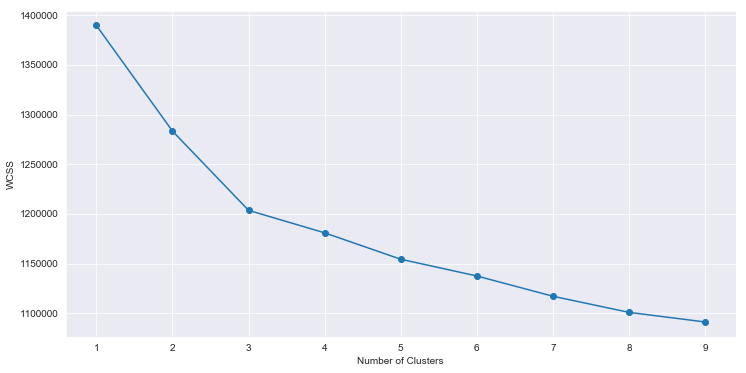

In [24]:
wcss=[]

for i in range (1,10):
    
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,10),wcss, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

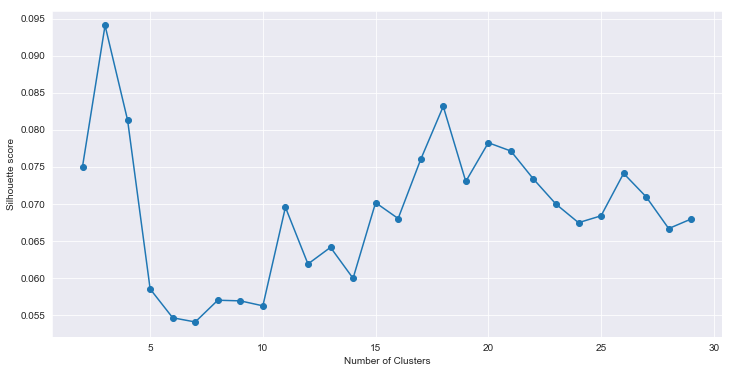

In [29]:
silhouettes = []

for i in range(2,30):
    
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    preds=kmeans.predict(X)
    silhouettes.append(silhouette_score(X, preds))
    
plt.figure(figsize=(12,6))
plt.plot(range(2,30), silhouettes,'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette score")
plt.show()

In [30]:
kmeans=KMeans(n_clusters =3, init='k-means++',max_iter=300, n_init=10, random_state=0)

In [31]:
kmeans_pred=kmeans.fit_predict(X)

In [32]:
kmeans.cluster_centers_.shape

(3, 89)

In [33]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [34]:
print(classification_report(y,kmeans_pred))

              precision    recall  f1-score   support

           0       0.34      0.35      0.34      3301
           1       0.34      0.30      0.32      3423
           2       0.36      0.40      0.38      3276

   micro avg       0.35      0.35      0.35     10000
   macro avg       0.35      0.35      0.35     10000
weighted avg       0.35      0.35      0.35     10000



## Random Sample Selection, in case rows are too much to be finished in a short time

In [28]:
sample_size=100000
random_state=42


df_r=ucr_all.sample(n=sample_size,random_state=random_state)
X=df_r.iloc[:,:-1]
y=df_r.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## KNN

In [12]:
#X=df_tree.iloc[:,:-1]
#y=df_tree.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X.head()

,Charlestown,Dorchester,Downtown,East Boston,Hyde Park,Jamaica Plain,Mattapan,Roxbury,South Boston,South End,...,Restraining Order Violations,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Set it to Euclidean Distance measure
knn=KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
knn_pred=knn.predict(X_test)

In [16]:
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     12334
           1       0.98      0.92      0.95     19408
           2       0.99      0.96      0.97     31458

   micro avg       0.95      0.95      0.95     63200
   macro avg       0.93      0.95      0.94     63200
weighted avg       0.95      0.95      0.95     63200

[[12030    82   222]
 [ 1356 17843   209]
 [ 1130   224 30104]]


## Naive Bayes

In [17]:
naive_b=GaussianNB()
naive_b.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
naive_preds=naive_b.predict(X_test)

In [19]:
print(classification_report(y_test,naive_preds))
print(confusion_matrix(y_test, naive_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12334
           1       0.99      1.00      0.99     19408
           2       1.00      0.99      1.00     31458

   micro avg       1.00      1.00      1.00     63200
   macro avg       1.00      1.00      1.00     63200
weighted avg       1.00      1.00      1.00     63200

[[12334     0     0]
 [    0 19380    28]
 [    0   201 31257]]


## SVM

In [152]:
df.head()

,Charlestown,Dorchester,Downtown,East Boston,Hyde Park,Jamaica Plain,Mattapan,Roxbury,South Boston,South End,...,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,UCR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [140]:
y[0:10]

0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    2
8    0
9    2
Name: UCR, dtype: int64

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y ,test_size=0.3,random_state=0)

Start with no kernal parameters defined, then apply  **Grid Search** later to tune the model

In [52]:
svc=SVC()

In [53]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
svc_pred=svc.predict(X_test)

In [55]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[ 318    0   59]
 [   0  590    5]
 [   0    3 1025]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       377
           1       0.99      0.99      0.99       595
           2       0.94      1.00      0.97      1028

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.98      0.94      0.96      2000
weighted avg       0.97      0.97      0.97      2000



## Model Evaluation

**Apply K-Fold Cross Validation to see the avaerage accuracy**

In [169]:
accuracy=cross_val_score(estimator=svc,
                           X=X_train,
                           y=y_train,
                           cv=10)
accuracy

array([0.99625094, 0.99550112, 0.99575   , 0.996     , 0.996     ,
       0.996     , 0.99525   , 0.997     , 0.9975    , 0.99374687])

In [170]:
accuracy.mean()

0.9958998935421223

**Apply Grid Search to determine the suitable variables**

In [56]:
grid_para=[
    {'C':[1,10,100,1000], 'kernel': ['linear']},
    {'C':[1,10,100,1000], 'kernel': ['rbf'], 'gamma': [1,0.5, 1/31, 0.001,0.0001]}
]

grid_search=GridSearchCV(estimator=svc,
                         param_grid=grid_para,
                         scoring = 'accuracy',
                         cv=10,
                         verbose=5,
                         n_jobs=-1)

In [57]:
grid_search=grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.6min finished


In [58]:
grid_score=grid_search.best_score_
grid_score

0.995375

In [59]:
best_parameters=grid_search.best_params_
best_parameters

{'C': 100, 'gamma': 0.03225806451612903, 'kernel': 'rbf'}

**Retrain the model using SVM**

In [60]:
svc_r=SVC(C=100, kernel='rbf',gamma=0.03225806451612903)
svc_r.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03225806451612903,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
svc_r_pred=svc_r.predict(X_test)

In [62]:
print(confusion_matrix(y_test, svc_r_pred))
print(classification_report(y_test, svc_r_pred))

[[ 377    0    0]
 [   0  594    1]
 [   1    3 1024]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       0.99      1.00      1.00       595
           2       1.00      1.00      1.00      1028

   micro avg       1.00      1.00      1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



**Use refined SVM model to re-predict the whole Training set**

In [67]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
svc_final=svc.predict(X)

In [68]:
print(confusion_matrix(y, svc_final))
print(classification_report(y, svc_final))

[[ 53013      0   8398]
 [     0  96207    848]
 [     0    971 156560]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     61411
           1       0.99      0.99      0.99     97055
           2       0.94      0.99      0.97    157531

   micro avg       0.97      0.97      0.97    315997
   macro avg       0.98      0.95      0.96    315997
weighted avg       0.97      0.97      0.97    315997



## Random Forest

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
rf_model=RandomForestClassifier(n_estimators=10,
                                criterion='entropy',
                                max_features='auto'
                                random_state=0)

In [7]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
rf_preds=rf_model.predict(X_test)

In [11]:
print(confusion_matrix(y_test, rf_preds))
print("\n")
print(classification_report(y_test, rf_preds))

[[12333     0     1]
 [    7 19334    67]
 [    4   209 31245]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12334
           1       0.99      1.00      0.99     19408
           2       1.00      0.99      1.00     31458

    accuracy                           1.00     63200
   macro avg       1.00      1.00      1.00     63200
weighted avg       1.00      1.00      1.00     63200



In [10]:
rf_final=rf_model.predict(X)

In [12]:
print(confusion_matrix(y, rf_final))
print("\n")
print(classification_report(y, rf_final))

[[ 61410      0      1]
 [     7  96884    164]
 [     5    897 156629]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61411
           1       0.99      1.00      0.99     97055
           2       1.00      0.99      1.00    157531

    accuracy                           1.00    315997
   macro avg       1.00      1.00      1.00    315997
weighted avg       1.00      1.00      1.00    315997



## Univariance Selection

In [23]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.Series(fit.scores_, index=X.columns)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score')) 

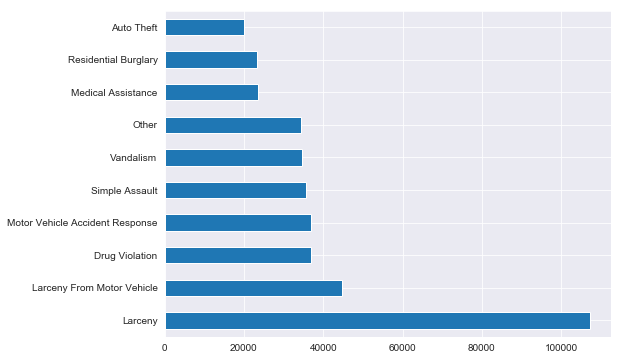

In [30]:
plt.figure(figsize=(8,6))
featureScores.nlargest(10).plot(kind='barh');

## Extra Tree Classifier (Feature Importance)

In [147]:
df=pd.read_csv("crime_cat.csv")

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [125]:
X.columns

Index(['Charlestown', 'Dorchester', 'Downtown', 'East Boston', 'Hyde Park',
       'Jamaica Plain', 'Mattapan', 'Roxbury', 'South Boston', 'South End',
       'West Roxbury', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Morning', 'Afternoon', 'Evening', 'Aircraft',
       'Assembly or Gathering Violations', 'Auto Theft', 'Ballistics',
       'Biological Threat', 'Bomb Hoax', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'Harassment',
       'Harbor Related Incidents', 'Homicide', 'Investigate Person',
       'Investigate Property', 'Landlord/Tenant Disputes', 'Larceny',
       'Larceny From Motor Vehicle', 'License Plate Related Incident

In [15]:
y.value_counts()

2    157531
1     97055
0     61411
Name: UCR, dtype: int64

In [22]:
e_tree=ExtraTreesClassifier()
e_tree.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
e_tree.feature_importances_[::-1]

array([2.26399629e-02, 2.63673311e-02, 3.48722423e-02, 6.76826353e-02,
       2.92798268e-02, 5.65436804e-02, 1.63789491e-03, 3.78398618e-03,
       2.01669834e-02, 7.72615349e-03, 2.59913639e-02, 7.66109872e-03,
       1.25112758e-03, 2.95702786e-03, 2.13534747e-02, 1.00811880e-02,
       1.47129014e-03, 9.86984884e-03, 2.29222529e-04, 1.79998875e-03,
       5.79278951e-02, 3.37257180e-03, 3.27625745e-03, 6.67622137e-02,
       1.09162385e-02, 1.41234685e-02, 4.65330205e-02, 5.21591386e-03,
       7.39508458e-03, 2.67708304e-03, 5.16771729e-02, 1.05742461e-01,
       4.39399443e-03, 2.39201766e-02, 3.40300296e-02, 2.70109604e-04,
       1.03148182e-03, 1.70363493e-02, 5.75837839e-05, 2.38510137e-02,
       8.93391769e-03, 3.41273330e-03, 7.56010212e-03, 1.85722196e-04,
       2.28651773e-03, 1.97962374e-03, 6.92442372e-02, 1.14851257e-02,
       7.99708662e-04, 6.68711766e-03, 1.39964616e-02, 3.93563003e-03,
       5.04151073e-04, 1.51830142e-05, 6.02849558e-03, 1.84006070e-02,
      

In [24]:
sum(e_tree.feature_importances_[::-1][0:3])

0.08387953628314374

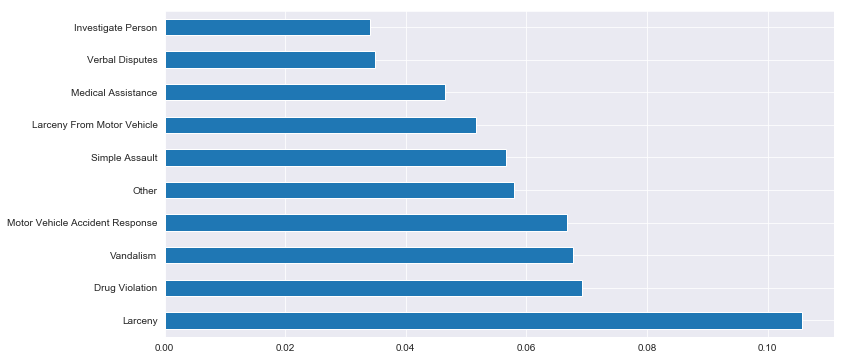

In [25]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(e_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Deep Learning

In [2]:
from tensorflow.python.client import device_lib

def get_devices():
   
    return [x.name for x in device_lib.list_local_devices()]

    print (get_devices())
    
def check_available():
    if tf.test.is_gpu_available():
        return True
        
        

print(device_lib.list_local_devices())
print('\n')
check_available()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9157827967494946625
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6622735237
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8065964793443790139
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]




True

In [68]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [28]:
df=pd.read_csv("crime_cat.csv")
df.columns

Index(['Charlestown', 'Dorchester', 'Downtown', 'East Boston', 'Hyde Park',
       'Jamaica Plain', 'Mattapan', 'Roxbury', 'South Boston', 'South End',
       'West Roxbury', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Morning', 'Afternoon', 'Evening', 'Aircraft',
       'Assembly or Gathering Violations', 'Auto Theft', 'Ballistics',
       'Biological Threat', 'Bomb Hoax', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'Harassment',
       'Harbor Related Incidents', 'Homicide', 'Investigate Person',
       'Investigate Property', 'Landlord/Tenant Disputes', 'Larceny',
       'Larceny From Motor Vehicle', 'License Plate Related Incident

In [29]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]

In [30]:
y=pd.get_dummies(y)

In [31]:
X[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
  

In [32]:
X.shape

(315997, 89)

In [33]:
y[0:5]

,0,1,2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [51]:
y.shape

(315997, 3)

In [35]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
ann_=Sequential()

In [43]:
#Input layer
ann_.add(Dense(input_dim=89, 
              output_dim=46, 
              init='uniform', 
              activation='relu'))

In [44]:
#Hidden Layer
ann_.add(Dense(output_dim=89, 
              init='uniform', 
              activation='relu'))

In [45]:
#Output Layer
ann_.add(Dense(output_dim=3, 
              init='uniform', 
              activation='softmax'))

In [46]:
ann_.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [47]:
ann_.fit(X_train, 
        y_train, 
        batch_size=10000,
        nb_epoch=50)

Epoch 1/50
236997/236997 [==============================] - 1s 2us/step - loss: 1.0675 - acc: 0.4913
Epoch 2/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.9292 - acc: 0.4982
Epoch 3/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.6609 - acc: 0.6759
Epoch 4/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.3704 - acc: 0.8081
Epoch 5/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.2119 - acc: 0.9692
Epoch 6/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.0980 - acc: 0.9871
Epoch 7/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.0496 - acc: 0.9961
Epoch 8/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.0326 - acc: 0.9963
Epoch 9/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.0246 - acc: 0.9963
Epoch 10/50
236997/236997 [==============================] - 0s 1us/step - loss: 0.0207 - a

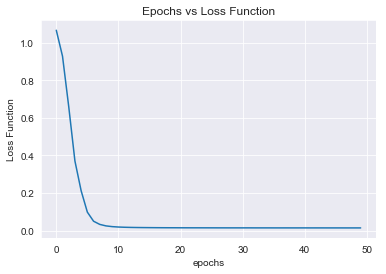

In [66]:
plt.figure(figsize=(6,4))
loss_func=ann_.history.history['loss']
epochs=range(len(loss_func))
plt.plot(epochs, loss_func)
plt.title("Epochs vs Loss Function")
plt.xlabel("epochs")
plt.ylabel("Loss Function");

In [49]:
ann_result=ann_.predict(X_test)

**Converted results back**

In [53]:
y_test=np.argmax(y_test.values, axis=1)

In [54]:
y_test[0:4]

array([2, 2, 1, 2], dtype=int64)

In [55]:
ann_result[0:4]

array([[8.9089335e-05, 2.2499479e-02, 9.7741139e-01],
       [4.3005843e-05, 2.6769307e-05, 9.9993026e-01],
       [1.6689274e-04, 9.7011459e-01, 2.9718539e-02],
       [6.0743267e-05, 1.3254707e-05, 9.9992597e-01]], dtype=float32)

In [56]:
print(confusion_matrix(y_test, np.argmax(ann_result, axis=1)))
print("\n")
print(classification_report(y_test, np.argmax(ann_result, axis=1)))

[[15381     0     0]
 [    0 24126    37]
 [    0   248 39208]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15381
           1       0.99      1.00      0.99     24163
           2       1.00      0.99      1.00     39456

   micro avg       1.00      1.00      1.00     79000
   macro avg       1.00      1.00      1.00     79000
weighted avg       1.00      1.00      1.00     79000

